In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, VPacker
from matplotlib.lines import Line2D
from matplotlib import colors as c
import datetime
from dateutil.relativedelta import relativedelta

In [6]:
current_date = datetime.datetime.now()
current_month = datetime.datetime.now().strftime("%m")
current_month_name = datetime.datetime.now().strftime("%B")
current_year = current_date.year
current_month_int = int(current_month)

# Calculate the second month from the current month
second_month_int = (current_month_int + 1) % 12 + 1

if second_month_int <= current_month_int:
    second_month_year = current_year + 1
else:
    second_month_year = current_year

# Get the name of the second month
end_month_name = datetime.datetime(second_month_year, second_month_int, 1).strftime("%B")

print(f"The second month from now is {end_month_name}.")
print(f"The current year is {current_year}.")
print(f"The second month from now is {end_month_name} {second_month_year}.")

The second month from now is November.
The current year is 2024.
The second month from now is November 2024.


['2024-09-16T00:00:00.000000000']


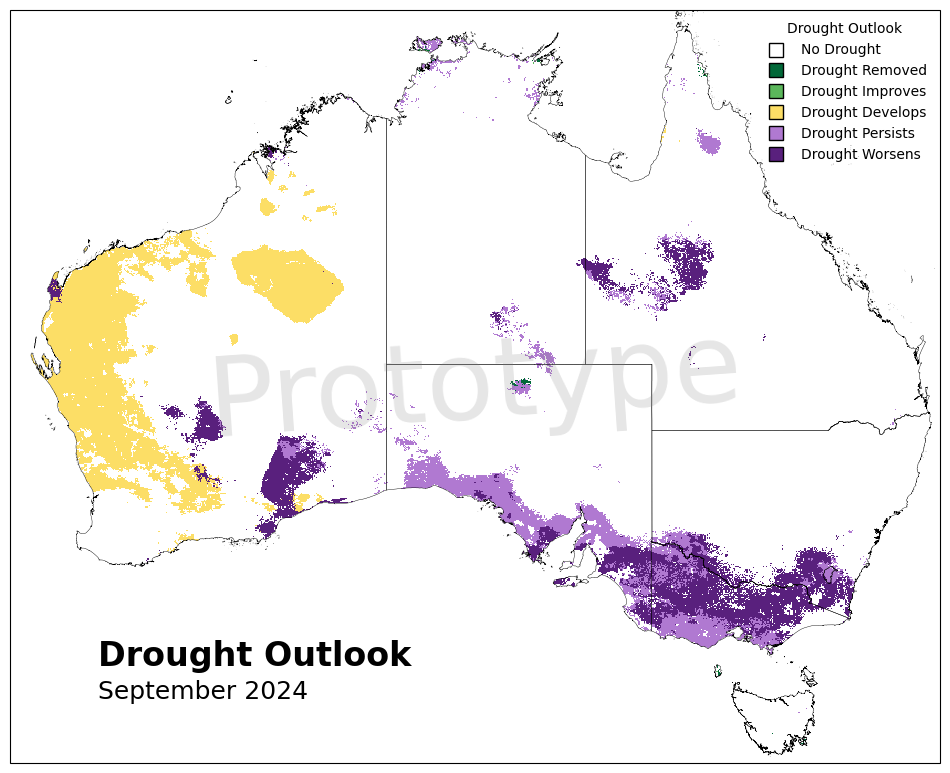

In [7]:
ncname =  "/Users/sabinmaharjan/projects/python/do/static/result/nc/1_months/"+current_month+"_Final_2024.nc"
shp_path = "/Users/sabinmaharjan/projects/python/do/static/shapes/gadm36_AUS_1.shp"

# Open the NetCDF file
ds = xr.open_dataset(ncname)

# Get the 2D data array for outlook
outlook_data = ds['outlook'].values

lat = ds['lat'].values
lon = ds['lon'].values
time=ds['time'].values
print(time)


# Define color levels and corresponding category colors
colors = ['#FFFFFF', '#016838', '#5BB75B', '#FCDE66', '#B079D1', '#59207D']
categories = ['No Drought', 'Drought Removed', 'Drought Improves', 'Drought Develops', 'Drought Persists', 'Drought Worsens']

# Create a ListedColormap with your desired colors
cmap = c.ListedColormap(colors)

# Create the figure and axes with larger size
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
# Plot the pseudocolor map using pcolormesh with the custom colormap
im = ax.pcolormesh(lon, lat, outlook_data, cmap=cmap, shading='auto')

# Load shapefile geometries
shp_feat = shpreader.Reader(shp_path).geometries()

# Add shapefile geometries to the plot
ax.add_geometries(shp_feat, ccrs.PlateCarree(), facecolor='none', linewidth=0.3)
# Create custom legend entries
legend_entries = [Line2D([0], [0], marker='s', color='none', label=category, markerfacecolor=color, markersize=10, linestyle='None') for color, category in zip(colors, categories)]

# Create custom legend
# legend = ax.legend(handles=legend_entries, loc='upper right', title='Drought Outlook', framealpha=0, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
legend = ax.legend(handles=legend_entries, loc='upper right', title='Drought Outlook', framealpha=0, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes, borderaxespad=0.5)
# Create custom legend
# legend = ax.legend(handles=legend_entries, loc='upper right', title='Drought Outlook', framealpha=0, bbox_to_anchor=(1.02, 1), bbox_transform=ax.transAxes)


# Add lower-left title and subtitle with adjusted position
title = TextArea('Drought Outlook', textprops=dict(color='black', size=24, weight='bold'))
subtitle = TextArea(current_month_name+ ' 2024', textprops=dict(color='black', size=18))
anchored_box = AnchoredOffsetbox(loc='lower left', child=VPacker(children=[title, subtitle], align='left', pad=5, sep=5),
                                 frameon=False, bbox_to_anchor=(0.08, 0.06), bbox_transform=ax.transAxes,
                                 borderpad=0.1)
ax.add_artist(anchored_box)

# Adding watermark text
ax.text(0.5, 0.5, 'Prototype', transform=ax.transAxes, fontsize=80, color='gray', alpha=0.2, ha='center', va='center', rotation=4)

out_ncname = "/Users/sabinmaharjan/projects/python/do/static/result/maps/1_months/drought-outlook_1_" + str(current_year) + "-" + current_month + ".jpg"


# Save the plot
plt.savefig(out_ncname, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


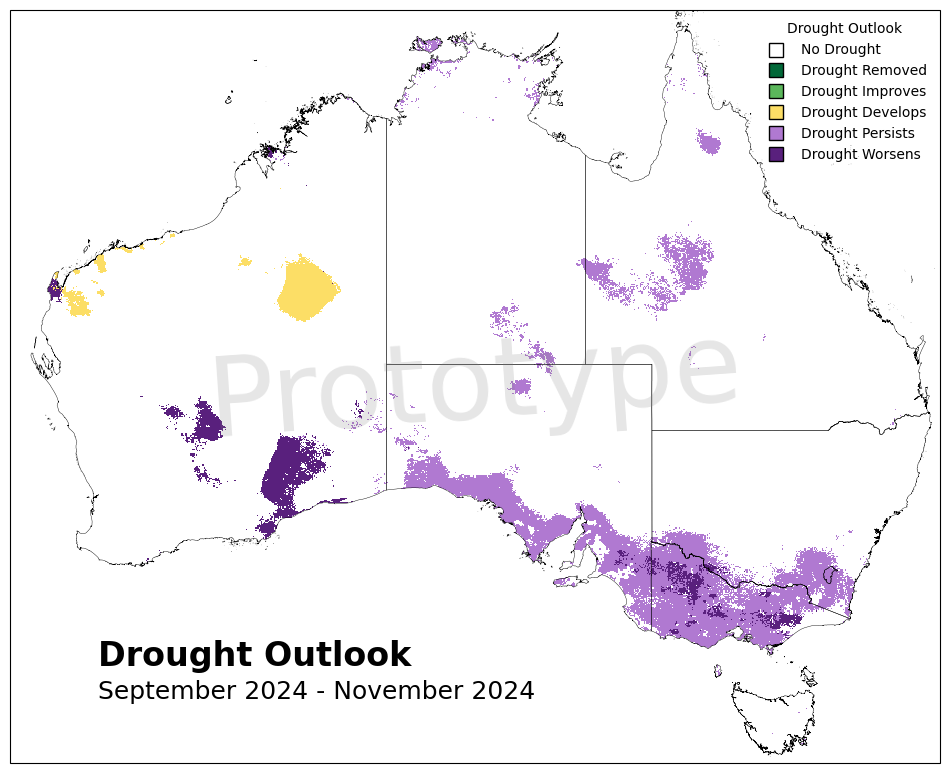

In [8]:




ncname =  "/Users/sabinmaharjan/projects/python/do/static/result/nc/3_months/app"+current_month+"_Final_2024.nc"

# Open the NetCDF file
ds = xr.open_dataset(ncname)

# Get the 2D data array for outlook
outlook_data = ds['outlook'].values

lat = ds['lat'].values
lon = ds['lon'].values

# Define color levels and corresponding category colors
colors = ['#FFFFFF', '#016838', '#5BB75B', '#FCDE66', '#B079D1', '#59207D']
categories = ['No Drought', 'Drought Removed', 'Drought Improves', 'Drought Develops', 'Drought Persists', 'Drought Worsens']

# Create a ListedColormap with your desired colors
cmap = c.ListedColormap(colors)

# Create the figure and axes with larger size
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
# Plot the pseudocolor map using pcolormesh with the custom colormap
im = ax.pcolormesh(lon, lat, outlook_data, cmap=cmap, shading='auto')

# Load shapefile geometries
shp_feat = shpreader.Reader(shp_path).geometries()

# Add shapefile geometries to the plot
ax.add_geometries(shp_feat, ccrs.PlateCarree(), facecolor='none', linewidth=0.3)
# Create custom legend entries
legend_entries = [Line2D([0], [0], marker='s', color='none', label=category, markerfacecolor=color, markersize=10, linestyle='None') for color, category in zip(colors, categories)]

# Create custom legend
# legend = ax.legend(handles=legend_entries, loc='upper right', title='Drought Outlook', framealpha=0, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
legend = ax.legend(handles=legend_entries, loc='upper right', title='Drought Outlook', framealpha=0, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes, borderaxespad=0.5)
# Create custom legend
# legend = ax.legend(handles=legend_entries, loc='upper right', title='Drought Outlook', framealpha=0, bbox_to_anchor=(1.02, 1), bbox_transform=ax.transAxes)


# Add lower-left title and subtitle with adjusted position
title = TextArea('Drought Outlook', textprops=dict(color='black', size=24, weight='bold'))
subtitle = TextArea(current_month_name+ ' 2024 - '+ end_month_name +' 2024', textprops=dict(color='black', size=18))
anchored_box = AnchoredOffsetbox(loc='lower left', child=VPacker(children=[title, subtitle], align='left', pad=5, sep=5),
                                 frameon=False, bbox_to_anchor=(0.08, 0.06), bbox_transform=ax.transAxes,
                                 borderpad=0.1)
ax.add_artist(anchored_box)

# Adding watermark text
ax.text(0.5, 0.5, 'Prototype', transform=ax.transAxes, fontsize=80, color='gray', alpha=0.2, ha='center', va='center', rotation=4)

out_ncname = "/Users/sabinmaharjan/projects/python/do/static/result/maps/3_months/drought-outlook_3_"+str(current_year)+"-"+current_month+".jpg"


# Save the plot
plt.savefig(out_ncname, dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


Map saved as /Users/sabinmaharjan/projects/python/do/static/result/maps/forecast/rainfall_forecast_2024-09.jpg


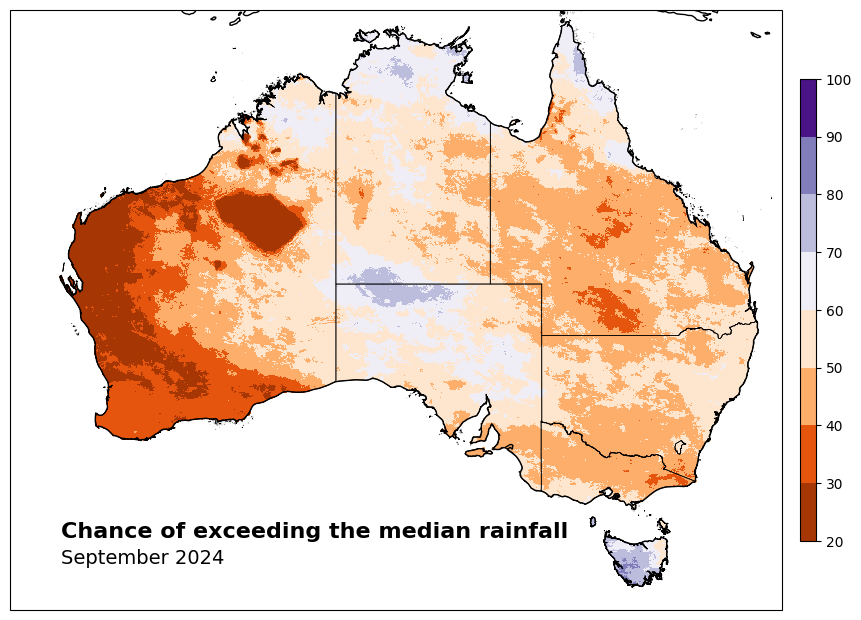

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, VPacker
import numpy as np
import datetime
import os

# Set the file paths
ncname_rain = "/Users/sabinmaharjan/projects/python/do/static/file/forecast_updated.nc"
shp_path = "/Users/sabinmaharjan/projects/python/do/static/shapes/gadm36_AUS_1.shp"

# Open the NetCDF file
ds = xr.open_dataset(ncname_rain)

# Get the rainfall forecast data
rain_data = ds['percentage_of_ensembles'].values[1, 0, :, :]  # Assuming we want the second bin and first time step

# Get latitude and longitude
lat = ds['latitude'].values
lon = ds['longitude'].values

# Get the time for the forecast
forecast_time = ds['time'].values[0]
forecast_date = pd.to_datetime(forecast_time)
forecast_month = forecast_date.strftime('%B %Y')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Create a custom colormap (reversed order)
colors = ['#a63603', '#e6550d', '#fdae6b', '#fee6ce', '#efedf5', '#bcbddc', '#807dba', '#4a1486']
n_bins = len(colors)
cmap = plt.cm.colors.ListedColormap(colors)
bounds = [20, 30, 40, 50, 60, 70, 80, 90, 100]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Plot the rainfall forecast data
im = ax.pcolormesh(lon, lat, rain_data, cmap=cmap, norm=norm, shading='auto')

# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Load and add shapefile geometries
shp_feat = shpreader.Reader(shp_path).geometries()
ax.add_geometries(shp_feat, ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, aspect=30, shrink=0.6)
cbar.ax.tick_params(labelsize=10)

# Add title and subtitle
title = TextArea('Chance of exceeding the median rainfall', textprops=dict(color='black', size=16, weight='bold'))
subtitle = TextArea(forecast_month, textprops=dict(color='black', size=14))
anchored_box = AnchoredOffsetbox(loc='lower left', child=VPacker(children=[title, subtitle], align='left', pad=5, sep=5),
                                 frameon=False, bbox_to_anchor=(0.05, 0.05), bbox_transform=ax.transAxes,
                                 borderpad=0)
ax.add_artist(anchored_box)

# Set extent to focus on Australia
ax.set_extent([110, 155, -45, -10], crs=ccrs.PlateCarree())

# Create the output directory if it doesn't exist
output_dir = "/Users/sabinmaharjan/projects/python/do/static/result/maps/forecast"
os.makedirs(output_dir, exist_ok=True)

# Save the plot
out_filename = os.path.join(output_dir, f"rainfall_forecast_{forecast_date.strftime('%Y-%m')}.jpg")
plt.savefig(out_filename, dpi=300, bbox_inches='tight', pad_inches=0.1)

print(f"Map saved as {out_filename}")

# Show the plot
plt.show()